## Setting Up

In [5]:
import numpy as np

%matplotlib inline

import matplotlib as mpl
mpl.style.use("seaborn")

from pltconfig import *

import matplotlib.pyplot as plt

np.set_printoptions(linewidth=500)

# Problem 4

## Part A

In [96]:
def plotBL(rho_in, sigma_in, axisbox, fig_name="BL_plot.pdf"):
    
    rho = np.vectorize(rho_in)
    sigma = np.vectorize(sigma_in)
    
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    theta = np.linspace(0.0, 2.0*np.pi, 1001);
    eitheta = np.exp(1j*theta)
    z = rho(eitheta) / sigma(eitheta)
    
    # setup the axis
    ax.axhline(0.0, color="k", lw=1.5)
    ax.axvline(0.0, color="k", lw=1.5)
    
    ax.plot(z.real, z.imag)
    ax.axis(axisbox)
    ax.set_ylabel(r"$\Im(z)$", fontsize=28)
    ax.set_xlabel(r"$\Re(z)$", fontsize=28)
    
    fig.tight_layout()
    fig.savefig(fig_name)

In [105]:
def makeplotBL(method=None, r=None, fig_name=None):
    
    if ((method is None) and r is None):
        print("Don't know what you want me to do bro")
        
    
    if (method.lower() == "euler"):
        rho = lambda z: z - 1.0
        sigma = lambda z: 1.0
        axisbox = [-3.0, 1.0, -2.0, 2.0]
        
    elif (method.lower() == "ab"):
        axisbox = [-3.0, 1.0, -2.0, 2.0]
        rho = lambda z: (z-1.0)*(z**(r-1))
        
        if (r == 1):
            sigma = lambda z: np.ones(z.size)
        elif (r == 2):
            sigma = lambda z: 0.5*(3.0*z - 1.0)
        elif (r == 3):
            sigma = lambda z: ((23.0*z-16.0)*z+5)/12.0
        elif (r == 4):
            sigma = lambda z: (((55.0*z-59.0)*z+37.0)*z-9.0)/24.0
        elif (r == 5):
            sigma = lambda z: ((((1901.0*z-2774.0)*z + 2616.0)*z-1274.0)*z + 251.0)/720.0
        else:
            print(f"r = {r} is not recognized")
            exit(1)
    elif (method.lower() == "am"):
        axisbox = [-5.0, 5.0, -5.0, 5.0]
        rho = lambda z: (z-1.0)*(z**(r-1))
        if (r == 1):
            sigma = lambda z: 0.5*(z+1.0)
        elif (r == 2):
            sigma = lambda z: ((5.0*z+8.0)*z-1)/12.0
        elif (r == 3):
            sigma = lambda z: (((9.0*z+19.0)*z-5.0)*z+1)/24.0
        elif (r == 4):
            sigma = lambda z: ((((251.0*z+646.0)*z-264.0)*z+106.0)-19.0)*z/720.0
        elif (r == 5):
            sigma = lambda z: (((((475.0*z + 1427.0)*z - 798.0)*z + 482.0)*z - 173.0)*z + 27)/1440.0
        else:
            print(f"r = {r} is not recognized")
            exit(1)
    elif (method.lower() == "bdf"):
        axisbox = [-5.0, 5.0, -5.0, 5.0]
        if (r == 2):
            rho = lambda z: (3.0*z-4.0)*z
            sigma = lambda z: 2.0*z*z
        else:
            print(f"r = {r} is not recognized")
            exit(1)
    else: 
        print(f"method = {method} if not recognized")
        exit(1)
    
    if (fig_name is not None):
        plotBL(rho, sigma, axisbox, fig_name)
    else:
        plotBL(rho, sigma, axisbox)

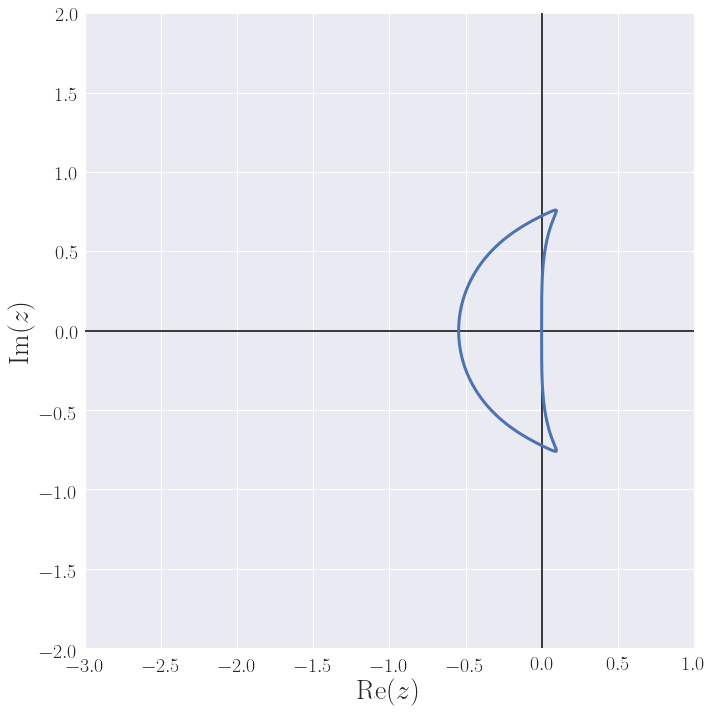

In [100]:
makeplotBL(method="ab", r=3, fig_name="BL_AB3_plot.pdf")

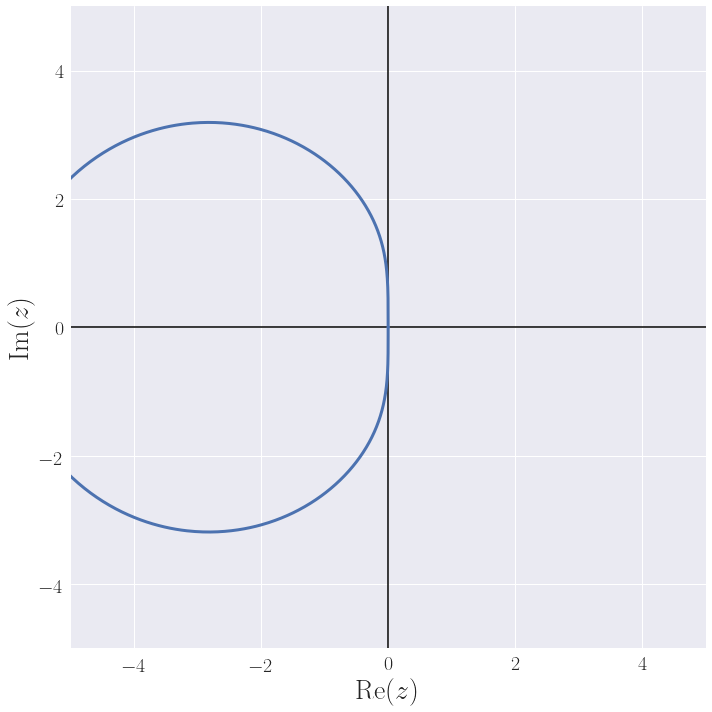

In [101]:
makeplotBL(method="am", r=2, fig_name="BL_AM2_plot.pdf")

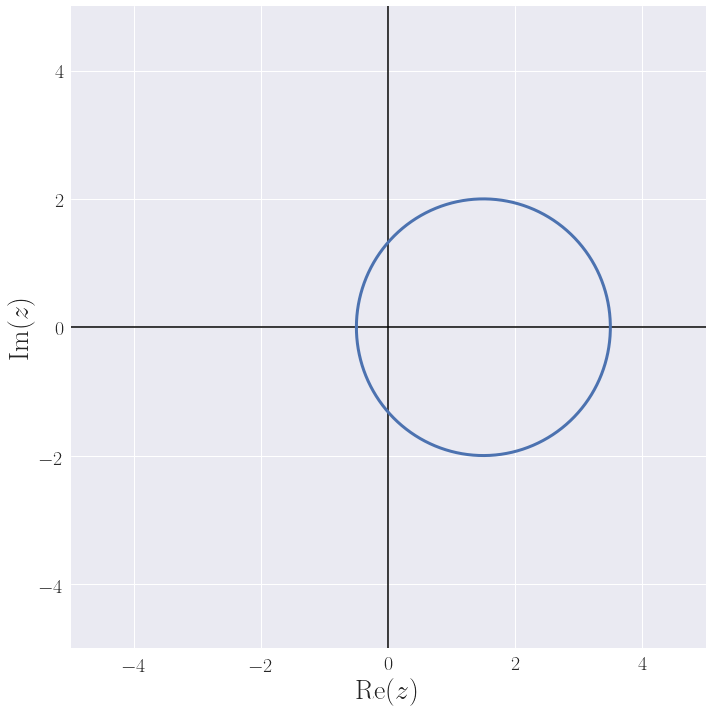

In [106]:
makeplotBL(method="bdf", r=2, fig_name="BL_BDF2_plot.pdf")

## Part B

In [25]:
def f(t, u, lmbda):
    return lmbda*u

def dfy(t, u, lmbda):
    return lmbda

def sol(t, t0, u0, lmbda):
    return np.exp(lmbda*(t-t0))*u0

In [53]:
# Runge-Kutta "Classic" Order 4 method
def RK4(t0, tn, k, u0, lmbda):
    n = int(abs(tn-t0)/k)
    t = np.linspace(t0, tn, n+1)
    u = np.zeros(n+1)
    u[0] = u0 # initialize starting point
    # iterate
    for i in range(n):
        Y1 = f(t[i],u[i], lmbda)
        Y2 = f(t[i]+0.5*k, u[i]+0.5*K1*k, lmbda)
        Y3 = f(t[i]+0.5*k, u[i]+0.5*K2*k, lmbda)
        Y4 = f(t[i]+k, u[i]+K3*k, lmbda)
        u[i+1] = u[i] + k*(Y1+2*Y2+2*Y3+Y4)/6
    return t, u

In [70]:
# Adams-Bashforth 3 Step Method
def AdBash3(t0, tn, k, u0, lmbda):
    n = int(abs(tn-t0)/k)
    t = np.linspace(t0, tn, n+1)
    u = np.zeros(n+1)
    __, u[0:3] = RK4(t0, t0+2*k, k, u0, lmbda)
    Y1 = f(t[1],u[1],lmbda)
    Y2 = f(t[0],u[0],lmbda)
    for i in range(2,n):
        # cycle the variables
        Y3 = Y2
        Y2 = Y1
        Y1 = f(t[i], u[i], lmbda)
        u[i+1] = u[i] + (k/12.0)*(23.0*Y1-16.0*Y2+5.0*Y3)
    return t, u

In [71]:
t_soln, u_soln = AdBash3(0.0, 2.0, 1e-3, u0=0.1, lmbda=-1.0)

In [94]:
def plot_around_stability(t0=0.0, tn=20.0, u0=10.0, lmbda=-1.0):
    
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    
#     k_to_try = [1e-2, 1e-1, 2.5e-1, 5e-1, 1e0, 2e0, 4e0]
    k_to_try = [1e-2, 1e-1, 2.5e-1, 5e-1, 7.5e-1]
    
    # plot true solution
    ax.plot(np.linspace(t0, tn, 1001), sol(np.linspace(t0, tn, 1001), t0, u0, lmbda), "r-", lw=5.0)
    
    for i, k_val in enumerate(k_to_try):
        t_soln, u_soln = AdBash3(t0, tn, k_val, u0, lmbda)
        
        ax.plot(t_soln, u_soln, "o-", color=f"C{i}", ms=5.0, label=f"{k_val:.2f}")
    
    ax.set_yscale("log")
    ax.legend(loc=0, prop={"size":14}, title=r"$k$", title_fontsize=18)
    ax.set_ylabel(r"$U[t_{n}]$", fontsize=28)
    ax.set_xlabel(r"$t_{n}$", fontsize=28)
    
    fig.tight_layout()
    fig.savefig("stability_plot.pdf")

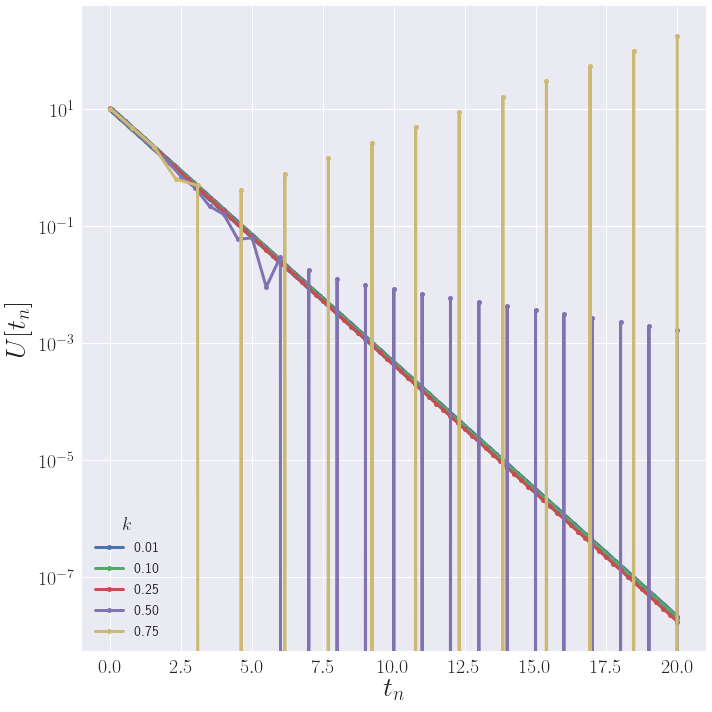

In [95]:
plot_around_stability()

In [111]:
def error_analysis(iterations=9, t0=0.0, tn=20.0, u0=10.0, lmbda=-1.0):
    
    error_array = np.zeros(iterations)
    kval_array = np.zeros(iterations)
    
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    
    # initialize the k_val
    k_val = 0.5
    
    for i in range(iterations):
        
        # record the k_val used
        kval_array[i] = k_val
        
        # compute the solution using AB3
        t_soln, u_soln = AdBash3(t0, tn, k_val, u0, lmbda)
        
        # compute and store the error (inf-norm)
        error_array[i] = (u_soln - sol(t_soln, t0, u0, lmbda)).__abs__().max()
        
        # halve the current k_val for next iteration
        k_val /= 2
        
    ax.loglog(kval_array, error_array, "o-")
    ax.loglog(kval_array, 0.1*(kval_array**3), "o-", label=r"ref. $k^{3}$ line")
    
    ax.legend(loc=0, prop={"size":16})
    ax.set_ylabel(r"$E[k]$", fontsize=28)
    ax.set_xlabel(r"$k$", fontsize=28)
    
    fig.tight_layout()
    fig.savefig("error_AB3_plot.pdf")

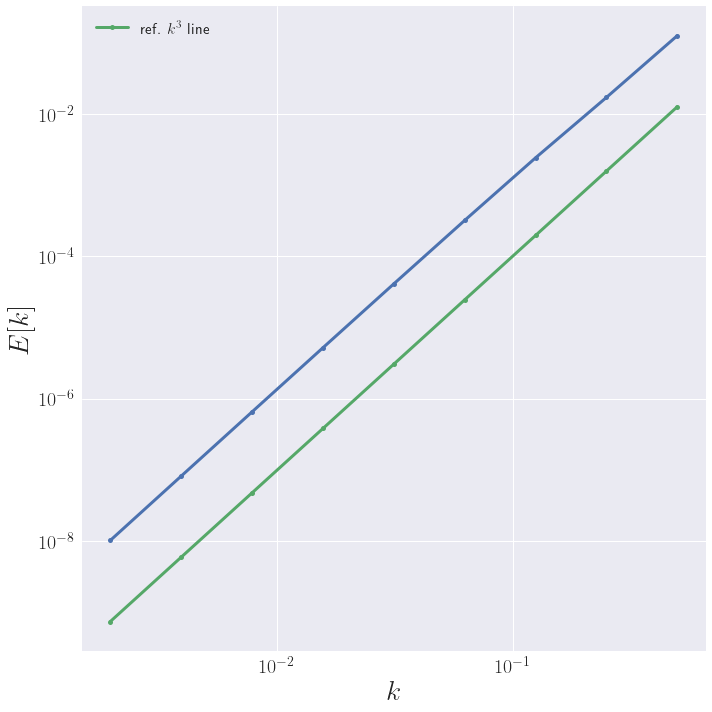

In [112]:
error_analysis()